CASE: VENDA NETFLIX

Supostamente com a alta desaceleração de assinantes da Netflix, um gerente decidiu contratar um cientista de dados para analisar as metricas dos ultimos 4 meses das aberturas e fechamentos de contas da Netflix.

DATASET

O dataset é o conjunto de métricas de uma conta na rede social Pinterest. 
O dataset contém 1 planilha com métricas coletadas entre 2002-05-23 a 2002-06-06. 
Nesse notebook foram analisados os dados contidos nesta tabela.
Os dados sobre os quais as informações não estão disponível em: 
https://www.kaggle.com/datasets/mayankanand2701/netflix-stock-price-dataset

In [2]:
#Importação das bibliotecas e dados.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.patches import ConnectionPatch
import numpy as np

In [9]:
import pandas as pd

# Leitura de um arquivo CSV, pd.read_csv
df = pd.read_csv('/Users/marilenevalentevieiradelacerda/Downloads/Netflix_Dataset.csv')

# primeiras dez linhas da tabela
df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400
6,2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
7,2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200
8,2002-06-05,1.110714,1.159286,1.107143,1.147143,1.147143,1531600
9,2002-06-06,1.150000,1.232143,1.148571,1.182143,1.182143,2305800


In [10]:
df.shape #mapeando os dados

(5540, 7)

In [14]:
print(df.columns.tolist()) #mostrando os títulos das colunas

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [12]:
df['Date'].isna().sum() #df seleciona a coluna chamada Date e o sum soma os valores de isna e isna 1=true e isna 0=false

0

In [15]:
df['Volume'].isna().sum() #df seleciona a coluna chamada Volume e o sum soma os valores de isna e isna 1=true e isna 0=false

0

VOLUME TOTAL DE ASSINATURAS FECHADAS NA DATA ESCOLHIDA

Foi escolhido a data de 2002-05-23 a 2002-06-06 aleatório, para se ter os gráficos mais fidedígnos possíveis.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


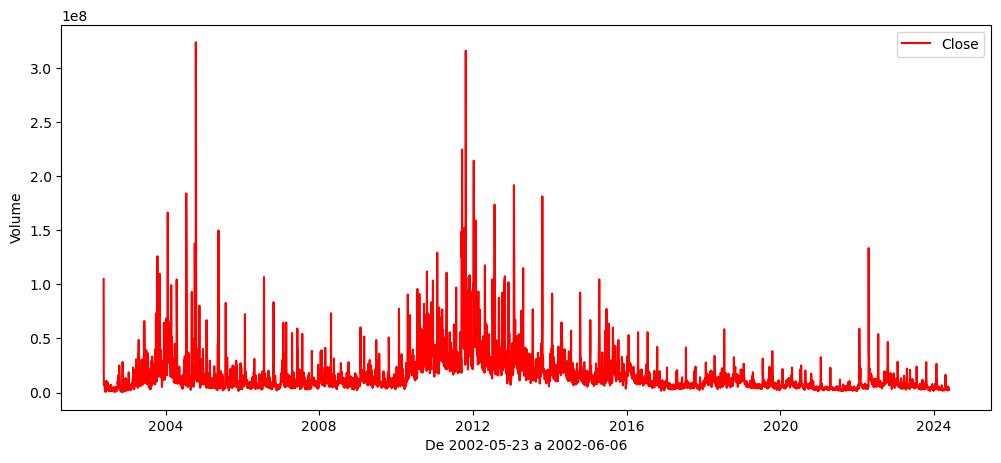

In [21]:
#Calculo da média do total de volumes de assinaturas Netflix

# Converção da coluna 'Date' para o tipo datetime, para fascilitar a edição do filtro
df['Date'] = pd.to_datetime(df['Date'])

# Filtra as linhas por período
filtro_data = (df['Date'] >= '2002-05-23') & (df['Date'] <= '2002-06-23')
df_filtrado = df.loc[filtro_data]


df_Close = df['Volume'].rolling( 7).mean()

plt.figure(figsize = ( 12, 5)) 
sns.lineplot( x = df['Date'], 
             y = df['Volume'], 
             data = df, 
             label = 'Close',
             color='red')
 
plt.xlabel('De 2002-05-23 a 2002-06-06') 
plt.ylabel('Volume');

No gráfico acima podemos ver as assinaturas encerradas no período de 2002-05-23 a 2002-06-06

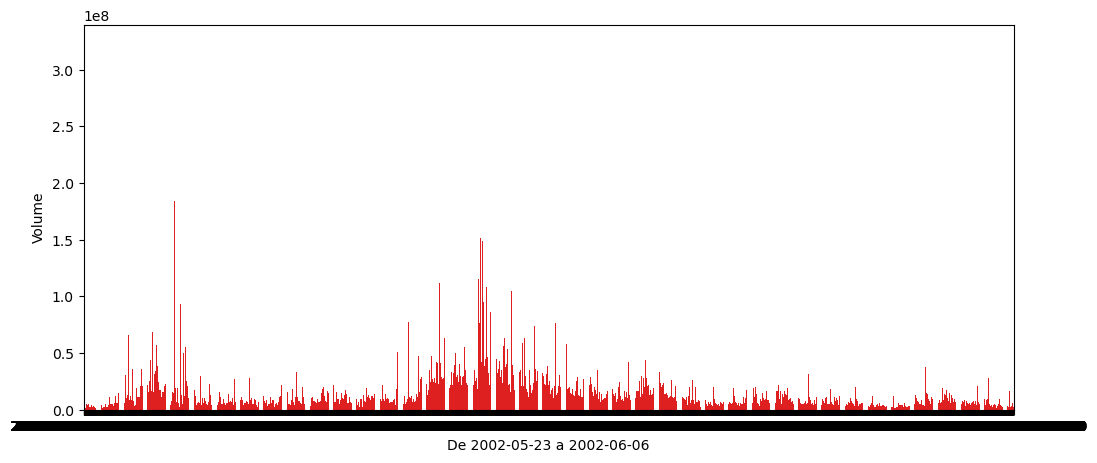

In [22]:
df_Open = df['Volume'].rolling( 7).mean()
plt.figure(figsize = ( 12, 5)) 
sns.barplot( x = df['Date'], 
             y = df['Volume'], 
             data = df, 
             label = 'Open',
             color='red')

plt.xlabel('De 2002-05-23 a 2002-06-06') 
plt.ylabel('Volume');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


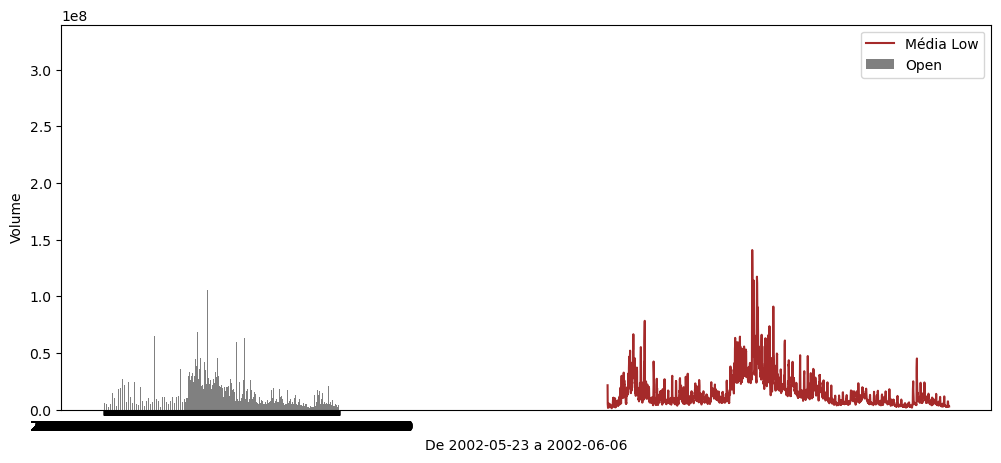

In [23]:
df_Low = df['Volume'].rolling( 7).mean()
plt.figure(figsize = ( 12, 5)) 
sns.barplot( x = df['Date'], 
             y = df['Volume'], 
             data = df, 
             label = 'Open',
             color='gray')
sns.lineplot( x = df['Date'], 
             y = df_Low, 
             data = df, 
             label = 'Média Low',
             color='brown') 
plt.xlabel('De 2002-05-23 a 2002-06-06') 
plt.ylabel('Volume');

No gráfico acima podemos ver as assinaturas mais baratas do pacote, no período de 2002-05-23 a 2002-06-06

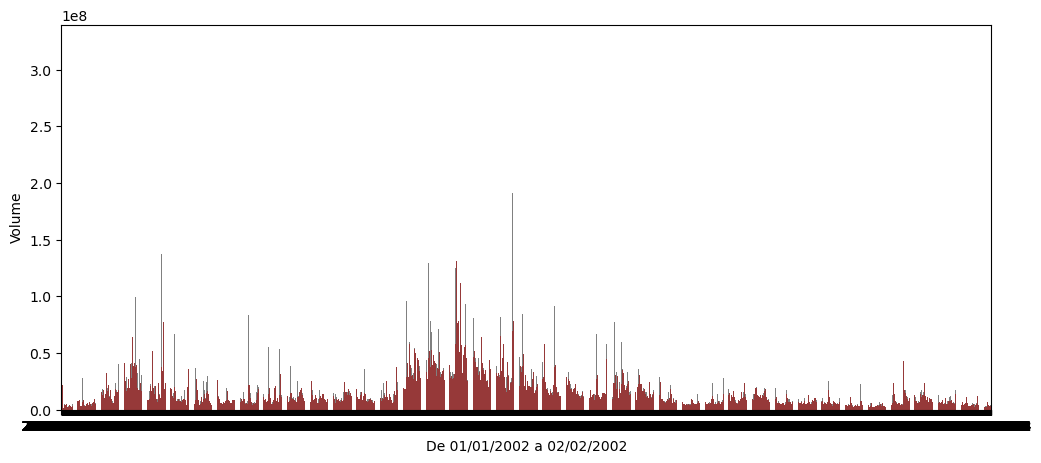

In [90]:
df_High = df['Volume'].rolling( 7).mean()
plt.figure(figsize = ( 12, 5)) 
sns.barplot( x = df['Date'], 
             y = df['Volume'], 
             data = df, 
             label = 'High',
             color='gray')
sns.barplot( x = df['Date'], 
             y = df_High, 
             data = df, 
             label = 'Média móvel',
             color='brown') 
plt.xlabel('De 2002-05-23 a 2002-06-06') 
plt.ylabel('Volume');

ADJUSTMENT CLOSE

Pacotes fechados conforme o ajustamento, na data de 2002-05-23 a 2002-06-06

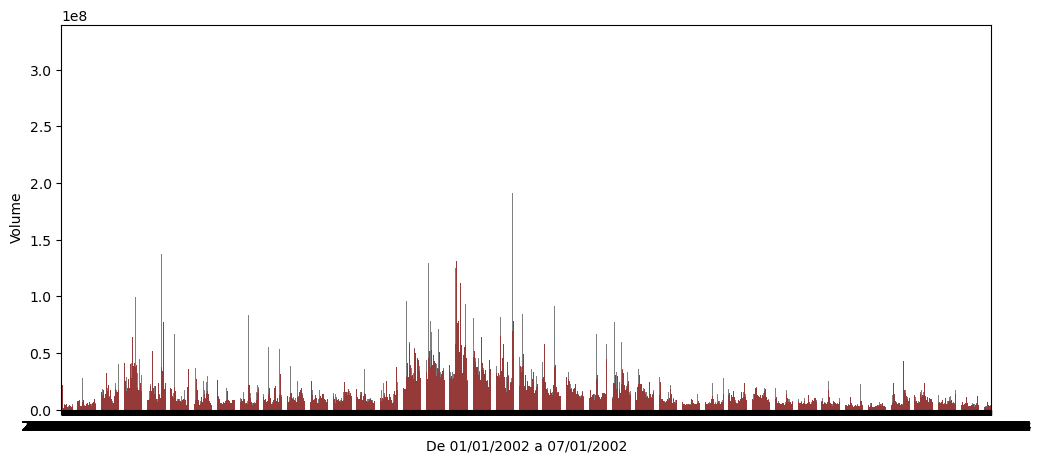

In [91]:

df_Adj_Close = df['Volume'].rolling( 7).mean()
plt.figure(figsize = ( 12, 5)) 
sns.barplot( x = df['Date'], 
             y = df['Volume'], 
             data = df, 
             label = 'Adj_Close',
             color='gray')
sns.barplot( x = df['Date'], 
             y = df_Adj_Close, 
             data = df, 
             label = 'Média Adj Close',
             color='brown') 
plt.xlabel('De 2002-05-23 a 2002-06-06') 
plt.ylabel('Volume');

Pacotes fechados conforme o ajustamento, na data de 2002-05-23 a 2002-06-06

In [103]:
# Filtra as linhas para o período de 01.01.2002 a 07.01.2002
filtro_data = (df['Date'] >= '2002-05-23') & (df['Date'] <= '2002-06-06')
df_filtrado = df.loc[filtro_data]

# Exibe o DataFrame filtrado 
print(df_filtrado)

        Date      Open      High       Low     Close  Adj Close     Volume
0 2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1 2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2 2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3 2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4 2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200
5 2002-05-31  1.078571  1.078571  1.071429  1.076429   1.076429    8464400
6 2002-06-03  1.080000  1.149286  1.076429  1.128571   1.128571    3151400
7 2002-06-04  1.135714  1.140000  1.110714  1.117857   1.117857    3105200
8 2002-06-05  1.110714  1.159286  1.107143  1.147143   1.147143    1531600
9 2002-06-06  1.150000  1.232143  1.148571  1.182143   1.182143    2305800


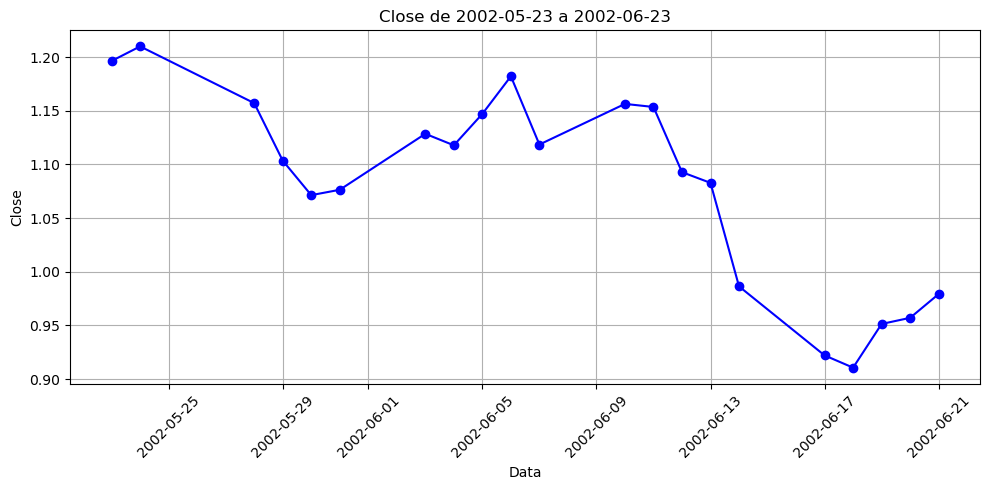

In [17]:
# Converção da coluna 'Date' para o tipo datetime, para fascilitar a edição do filtro
df['Date'] = pd.to_datetime(df['Date'])

# Filtra as linhas por período
filtro_data = (df['Date'] >= '2002-05-23') & (df['Date'] <= '2002-06-23')
df_filtrado = df.loc[filtro_data]

# Plotação do gráfico de linha para a coluna 'Close' filtrada
plt.figure(figsize=(10, 5))
plt.plot(df_filtrado['Date'], df_filtrado['Close'], marker='o', color='b')
plt.xlabel('Data')
plt.ylabel('Close')
plt.title('Close de 2002-05-23 a 2002-06-23')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Exibe o gráfico
plt.show()

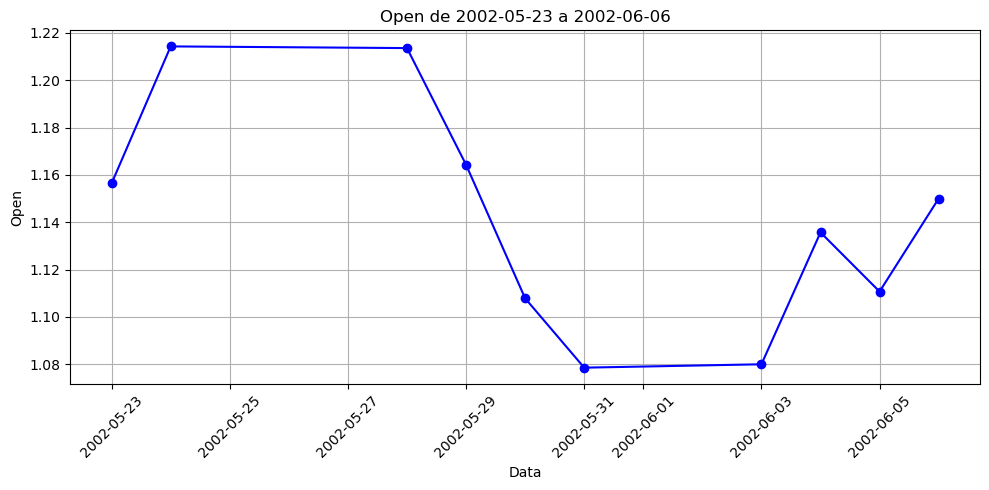

In [115]:
# Converta a coluna 'Date' para o tipo datetime, se ainda não estiver
df['Date'] = pd.to_datetime(df['Date'])

# Filtra as linhas para o período de 01.01.2002 a 07.01.2002
filtro_data = (df['Date'] >= '2002-05-23') & (df['Date'] <= '2002-06-06')
df_filtrado = df.loc[filtro_data]

# Plota um gráfico de linha para a coluna 'Close' filtrada
plt.figure(figsize=(10, 5))
plt.plot(df_filtrado['Date'], df_filtrado['Open'], marker='o', color='b')
plt.xlabel('Data')
plt.ylabel('Open')
plt.title('Open de 2002-05-23 a 2002-06-06')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Exibe o gráfico
plt.show()

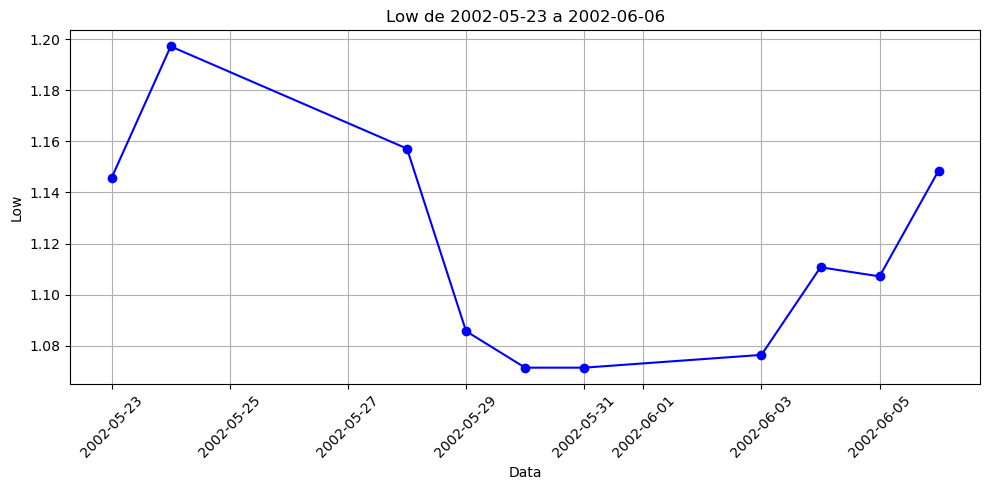

In [114]:
# Converta a coluna 'Date' para o tipo datetime, se ainda não estiver
df['Date'] = pd.to_datetime(df['Date'])

# Filtra as linhas para o período de 01.01.2002 a 07.01.2002
filtro_data = (df['Date'] >= '2002-05-23') & (df['Date'] <= '2002-06-06')
df_filtrado = df.loc[filtro_data]

# Plota um gráfico de linha para a coluna 'Close' filtrada
plt.figure(figsize=(10, 5))
plt.plot(df_filtrado['Date'], df_filtrado['Low'], marker='o', color='b')
plt.xlabel('Data')
plt.ylabel('Low')
plt.title('Low de 2002-05-23 a 2002-06-06')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Exibe o gráfico
plt.show()

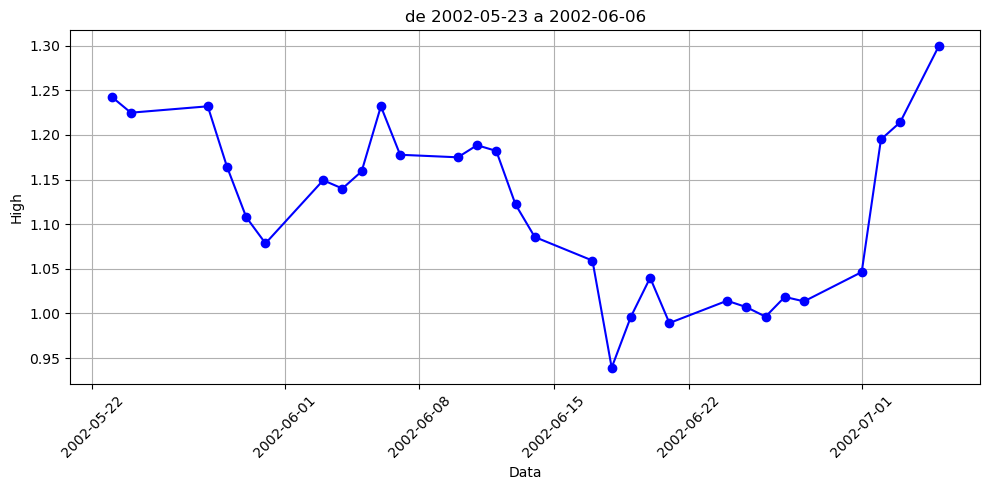

In [123]:
# Converta a coluna 'Date' para o tipo datetime, se ainda não estiver
df['Date'] = pd.to_datetime(df['Date'])

# Filtra as linhas para o período de 01.01.2002 a 07.01.2002
filtro_data = (df['Date'] >= '2002-01-01') & (df['Date'] <= '2002-07-07')
df_filtrado = df.loc[filtro_data]

# Plota um gráfico de linha para a coluna 'Close' filtrada
plt.figure(figsize=(10, 5))
plt.plot(df_filtrado['Date'], df_filtrado['High'], marker='o', color='b')
plt.xlabel('Data')
plt.ylabel('High')
plt.title('de 2002-05-23 a 2002-06-06')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Exibe o gráfico
plt.show()

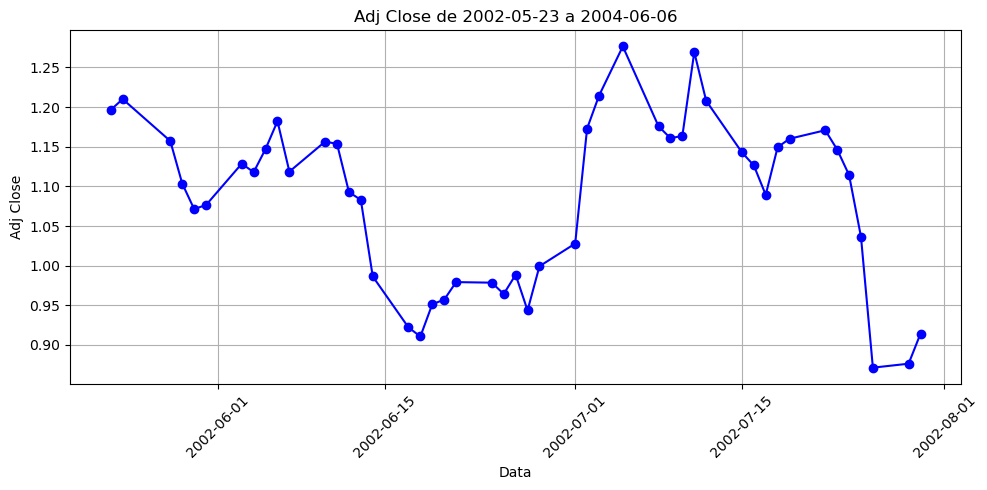

In [122]:
# Converta a coluna 'Date' para o tipo datetime, se ainda não estiver
df['Date'] = pd.to_datetime(df['Date'])

# Filtra as linhas para o período de 01.01.2002 a 07.01.2002
filtro_data = (df['Date'] >= '2002-01-01') & (df['Date'] <= '2002-07-30')
df_filtrado = df.loc[filtro_data]

# Plota um gráfico de linha para a coluna 'Close' filtrada
plt.figure(figsize=(10, 5))
plt.plot(df_filtrado['Date'], df_filtrado['Adj Close'], marker='o', color='b')
plt.xlabel('Data')
plt.ylabel('Adj Close')
plt.title('Adj Close de 2002-05-23 a 2004-06-06')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Exibe o gráfico
plt.show()